# Short Test 2 (Sem B)
## **Question 1**
Consider a rod of length $L=10cm$ with heat diffusion coefficient $\alpha=0.735cm^2s$.

The boundary conditions are $u(t,0)=100\degree C$ and $u(t,L)=25\degree C$.

Take $\Delta x=0.2cm$ and $\Delta t=0.01s$.

### **Part A:** Solve the diffusion equation using the explicit Euler method.
Diffusion equation is given by
$$
\frac{\partial u(t,\mathbf{r})}{\partial t}= \alpha\nabla^2u(t,\mathbf{r})
$$
In one-dimension, and with our known values, this becomes
$$
\forall x:0\leq x\leq10,\frac{\partial u(t,x)}{\partial t}= (0.755)\frac{\partial^2}{\partial x^2}u(t,x)
$$

In [60]:
import numpy as np
import matplotlib.pyplot as plt

'''PARAMS'''
length = 10.0 # rod length 12cm
time = 12.0 # time period 12s
heatCoeff = 0.735 # heat diffusion coefficient 0.735 cm^2 s
xstep = 0.2 # Δx = 0.2cm
tstep = 0.01 # Δt = 0.01s


Creating a grid of points in the variable u.

In [61]:
# Number of spatial points
nx=int(round(length/xstep))+1

# Number of time points
nt=int(round((time)/tstep))+1

U = np.zeros((nt, nx)) # nt by nx array of zeros

Implementing the boundary conditions,

$u(t,0)=100\degree C$ and $u(t,L)=25\degree C$.

In [62]:
'''BOUNDARY CONDITIONS'''
for t in range(0,nt):
    U[t,0] = 100    # @X=0, u=100
    U[t,nx-1] = 25  # @X=L, u=25

To integrate this, we discretise the RHS of
$$
\frac{\partial u(t,x)}{\partial t}= \alpha\frac{\partial^2}{\partial x^2}u(t,x)
$$
Using the explicit (forward Euler method) to get,
$$
\alpha\frac{\partial^2}{\partial x^2}\approx\cdot\frac{u(t,x+\Delta x)-2u(t,x)+u(t,x+\Delta x)}{\Delta x^2} = \frac{du}{dt}
$$

Switching to index notation where $i$ denotes steps in $t$ and $n$ denotes steps in $x$:
$$
\alpha\cdot\frac{u_{i,n+1}-2u_{i,n}+u_{i,n-1}}{\Delta x^2}=\frac{du}{dt}
$$
Now, we implement the Euler method on the RHS ODE, to get
$$
\begin{align}&\alpha\cdot\frac{u_{i,n+1}-2u_{i,n}+u_{i,n-1}}{\Delta x^2}=\frac{u_{i+1,n}-u_{i,n}}{\Delta t}\\\\
\Rightarrow &u_{i+1,n}=\alpha\cdot\frac{\Delta t}{\Delta x^2}\left(u_{i,n+1}-2u_{i,n}+u_{i,n-1}\right)+u_{i,n}
\end{align}
$$

In [63]:
'''NUMERICAL INTEGRATION'''
def g():
    return
def forwardEuler(t,dt,u):
    for n in range(t.shape[0]-1): # for each element in time-space
        u[n+1]=u[n]+dt*g(t[n], u[n]) # forward euler method
    return u

for i in range(nt-1):
    for n in range(1,nx-1):
        U[i+1,n] = U[i,n+1]-2*(U[i,n])+U[i,n-1]
        U[i+1,n] *= heatCoeff
        U[i+1,n] *= (tstep)/pow(xstep,2)
        U[i+1,n] += U[i,n]

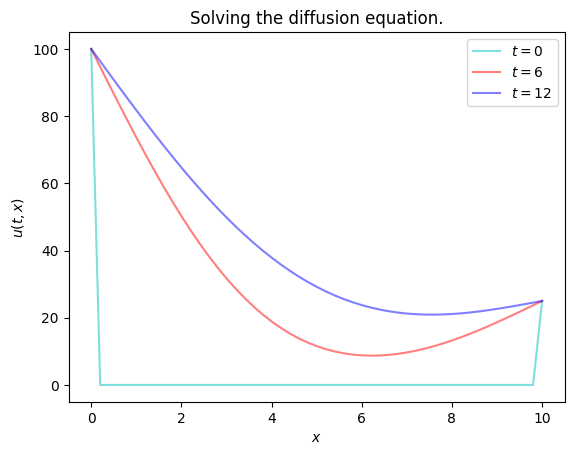

In [69]:
'''PLOTTING'''
fig, ax = plt.subplots()
X = np.arange(0,51)
Y0,Y6,Y12 = U[0][X], U[round(6/tstep)][X], U[round(12/tstep)][X]
X = np.linspace(0,10,51)
ax.plot(X, Y0, color="c", alpha=0.5, linestyle='-', label=r'$t=0$')
ax.plot(X, Y6, color="r", alpha=0.5, linestyle='-', label=r'$t=6$')
ax.plot(X, Y12, color="b", alpha=0.5, linestyle='-', label=r'$t=12$')
#ax.plot(X1, Y1, color="C1", marker='x', linestyle='none', label='')
ax.set_title('Solving the diffusion equation.')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$u(t,x)$')
ax.legend(loc="upper right")

In [70]:
U[1200,20]

37.8952854867378